In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
from dotenv import load_dotenv
load_dotenv("../.env.local")

from polybridge import PolybridgeClient
from datetime import datetime, timedelta, timezone

import pandas as pd

In [5]:
client = PolybridgeClient(api_key=os.getenv("POLYBRIDGE_API_KEY"))

In [6]:
# Test the new endpoint
end_time = datetime.now(timezone.utc)
start_time = end_time - timedelta(hours=8)

result = client.fetch_up_or_down_options_timeseries(
    asset="BTC",
    start_ts=start_time.isoformat(),
    end_ts=end_time.isoformat(),
    window_days=[7, 30],  # Optional, defaults to [7, 30]
    horizon="daily"  # Optional, defaults to "daily"
)

# Convert to DataFrame
rows = result["rows"]
df = pd.DataFrame(rows)

In [7]:
# Check the structure
print(f"Got {len(df)} rows")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())

# Check data types
print(f"\nData types:")
print(df.dtypes)

# Check for missing data
print(f"\nMissing values per column:")
print(df.isnull().sum())

Got 96 rows

Columns: ['timestamp_bucket', 'prob_up_next', 'prob_up_next_plus_1', 'spot_price', 'spot_price_exchange', 'rv_7d', 'rv_30d', 'iv_next_7d', 'iv_next_30d', 'vol_premium_next_7d', 'vol_premium_next_30d', 'drift_next_7d', 'drift_next_30d', 'realized_drift_next_7d', 'realized_drift_next_30d', 'vol_of_vol_next_7d', 'vol_of_vol_next_30d', 'iv_next_plus_1_7d', 'iv_next_plus_1_30d', 'vol_premium_next_plus_1_7d', 'vol_premium_next_plus_1_30d', 'drift_next_plus_1_7d', 'drift_next_plus_1_30d', 'realized_drift_next_plus_1_7d', 'realized_drift_next_plus_1_30d', 'vol_of_vol_next_plus_1_7d', 'vol_of_vol_next_plus_1_30d']

First few rows:
            timestamp_bucket  prob_up_next  prob_up_next_plus_1  spot_price  \
0  2025-11-05 15:15:00+00:00         0.825                0.505   102998.55   
1  2025-11-05 15:20:00+00:00         0.870                0.505   103211.07   
2  2025-11-05 15:25:00+00:00         0.870                0.505   103328.73   
3  2025-11-05 15:30:00+00:00         0.93

In [8]:
df[['timestamp_bucket', 'prob_up_next', 'spot_price', 'iv_next_7d', 'rv_7d']]

,timestamp_bucket,prob_up_next,spot_price,iv_next_7d,rv_7d
0,2025-11-05 15:15:00+00:00,0.825,102998.55,NaN,0.525098
1,2025-11-05 15:20:00+00:00,0.870,103211.07,NaN,0.525148
2,2025-11-05 15:25:00+00:00,0.870,103328.73,NaN,0.525210
3,2025-11-05 15:30:00+00:00,0.935,103344.58,NaN,0.524482
4,2025-11-05 15:35:00+00:00,0.950,103400.01,NaN,0.524476
...,...,...,...,...,...
91,2025-11-05 22:50:00+00:00,0.440,103649.18,35.067295,0.494712
92,2025-11-05 22:55:00+00:00,0.495,103744.68,19.891336,0.494710
93,2025-11-05 23:00:00+00:00,0.495,103736.83,20.669566,0.494485
94,2025-11-05 23:05:00+00:00,0.510,103728.96,17.986430,0.494437


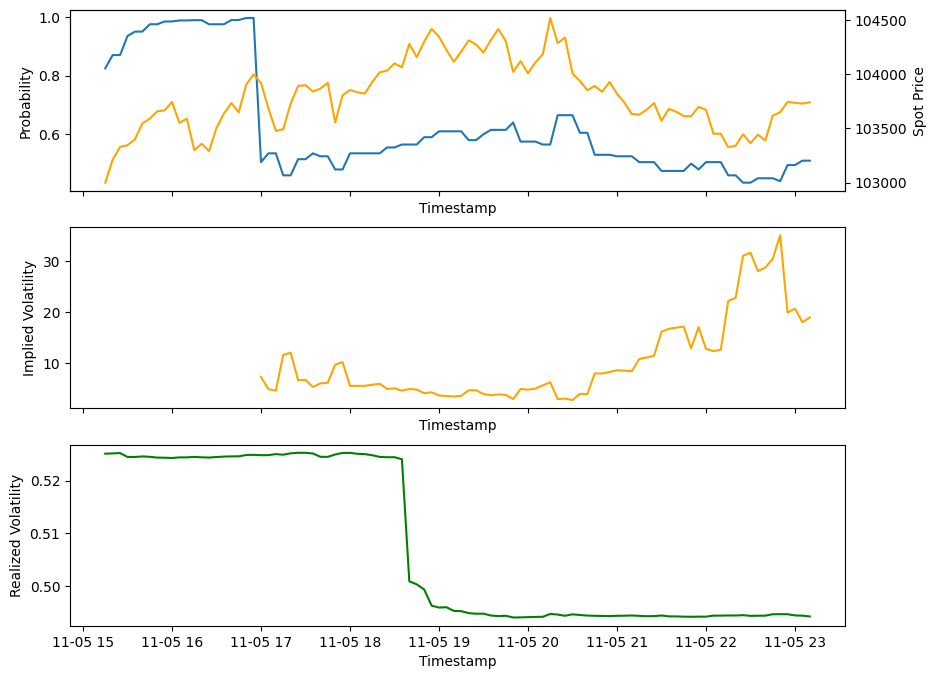

In [9]:
import matplotlib.pyplot as plt

# Plot the probability of the up-or-down market
fig, ax = plt.subplots(figsize=(10, 8), nrows=3, ncols=1, sharex=True)
axx = ax[0]
axx.plot(pd.to_datetime(df['timestamp_bucket']), df['prob_up_next'], label='Probability of Up-or-Down Market')
axx2 = axx.twinx()
axx2.plot(pd.to_datetime(df['timestamp_bucket']), df['spot_price'], label='Binance Spot Price', color='orange')
axx.set_xlabel('Timestamp')
axx.set_ylabel('Probability')
# axx.legend()
axx2.set_ylabel('Spot Price')
# axx2.legend()

axx = ax[1]
axx.plot(pd.to_datetime(df['timestamp_bucket']), df['iv_next_7d'], label='Implied Volatility', color='orange')
axx.set_xlabel('Timestamp')
axx.set_ylabel('Implied Volatility')
# axx.legend()

axx = ax[2]
axx.plot(pd.to_datetime(df['timestamp_bucket']), df['rv_7d'], label='Realized Volatility', color='green')
axx.set_xlabel('Timestamp')
axx.set_ylabel('Realized Volatility')
# axx.legend()


plt.show()

